# Salary Prediction


## About Dataset
I found this data on kaggle and I use it to predict the salary baisd on some features and here are the explnation that the owner provided.

This file contains detailed information about data professionals, including their salaries, designations, departments, and more. The data can be used for salary prediction, trend analysis, and HR analytics.

## Data Collection:
The dataset was compiled from internal HR records of a hypothetical company. Each record represents a unique data professional with various attributes collected from their employment history. The data spans from 2009 to 2016, capturing a snapshot as of January 7, 2016. Data Organization: The data has been organized chronologically by the date of joining (DOJ). Each row represents an individual data professional. Various attributes such as designation, department, and performance ratings have been included to enable comprehensive analysis.

### link to the dataset
("https://www.kaggle.com/datasets/krishujeniya/salary-prediction-of-data-professions")

In [13]:
# First of all we have to import the necessary libraries to load and explore the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# load and Display the first few rows of the dataset
path = r"C:\Users\hassa\Downloads\salary prediction.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,DEPARTMENT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Full Name
0,0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,TOMASA ARMEN
1,2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,OLIVE ANCY
2,3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,CHERRY AQUILAR
3,4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,LEON ABOULAHOUD
4,6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,ELLIOT AGULAR


### EDA analysis

In [3]:
# chicking if there are Null values or ronge data tyapes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2637 non-null   int64  
 1   FIRST NAME        2637 non-null   object 
 2   LAST NAME         2637 non-null   object 
 3   SEX               2637 non-null   object 
 4   DOJ               2637 non-null   object 
 5   CURRENT DATE      2637 non-null   object 
 6   DESIGNATION       2637 non-null   object 
 7   AGE               2635 non-null   float64
 8   SALARY            2637 non-null   int64  
 9   DEPARTMENT        2637 non-null   object 
 10  LEAVES USED       2635 non-null   float64
 11  LEAVES REMAINING  2635 non-null   float64
 12  RATINGS           2636 non-null   float64
 13  PAST EXP          2637 non-null   int64  
 14  Full Name         2637 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 309.2+ KB


In [5]:
# print the shape of the dataset
df.shape

(2637, 15)

In [7]:
# now let's Check for the presence of missing values (NaN) in the DataFrame
df.isna().values.any()

True

There are some (NaN) values we have to check it

In [6]:
# show which columns has (NaN) values
df.isna().sum()

Unnamed: 0          0
FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 2
SALARY              0
DEPARTMENT          0
LEAVES USED         2
LEAVES REMAINING    2
RATINGS             1
PAST EXP            0
Full Name           0
dtype: int64

Our features will be ['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'DEPARTMENT'] columns so we have to deal with (NaN) values in these columns.

In [8]:
# replace the missing values with the mode
mode = df['SEX'].mode()
df['SEX'].fillna(mode, inplace = True)

In [9]:
# replace the missing values with the mean
mean = df['AGE'].mean()
df['AGE'].fillna(mean, inplace = True)

In [10]:
# check if the (NaN) values is gone 
df.isna().sum()

Unnamed: 0          0
FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
DEPARTMENT          0
LEAVES USED         2
LEAVES REMAINING    2
RATINGS             1
PAST EXP            0
Full Name           0
dtype: int64

In [11]:
# drop unnecessary columns
columns = ['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'DEPARTMENT']
df = df[columns]
df

,SEX,DESIGNATION,AGE,SALARY,DEPARTMENT
0,F,Analyst,21.000000,44570,Finance
1,F,Analyst,21.000000,40955,Finance
2,F,Analyst,22.000000,45550,IT
3,M,Analyst,24.757495,43161,Operations
4,M,Analyst,22.000000,40339,Marketing
...,...,...,...,...,...
2632,F,Senior Manager,36.000000,185977,Management
2633,F,Analyst,23.000000,45758,IT
2634,F,Analyst,21.000000,47315,Web
2635,F,Analyst,24.000000,45172,Web


### Model Building and Evaluating 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

            AGE  SALARY  SEX_M  DESIGNATION_Associate  DESIGNATION_Director  \
0     21.000000   44570  False                  False                 False   
1     21.000000   40955  False                  False                 False   
2     22.000000   45550  False                  False                 False   
3     24.757495   43161   True                  False                 False   
4     22.000000   40339   True                  False                 False   
...         ...     ...    ...                    ...                   ...   
2632  36.000000  185977  False                  False                 False   
2633  23.000000   45758  False                  False                 False   
2634  21.000000   47315  False                  False                 False   
2635  24.000000   45172  False                  False                 False   
2636  24.000000   49176   True                  False                 False   

      DESIGNATION_Manager  DESIGNATION_Senior Analy

<IPython.core.display.Javascript object>


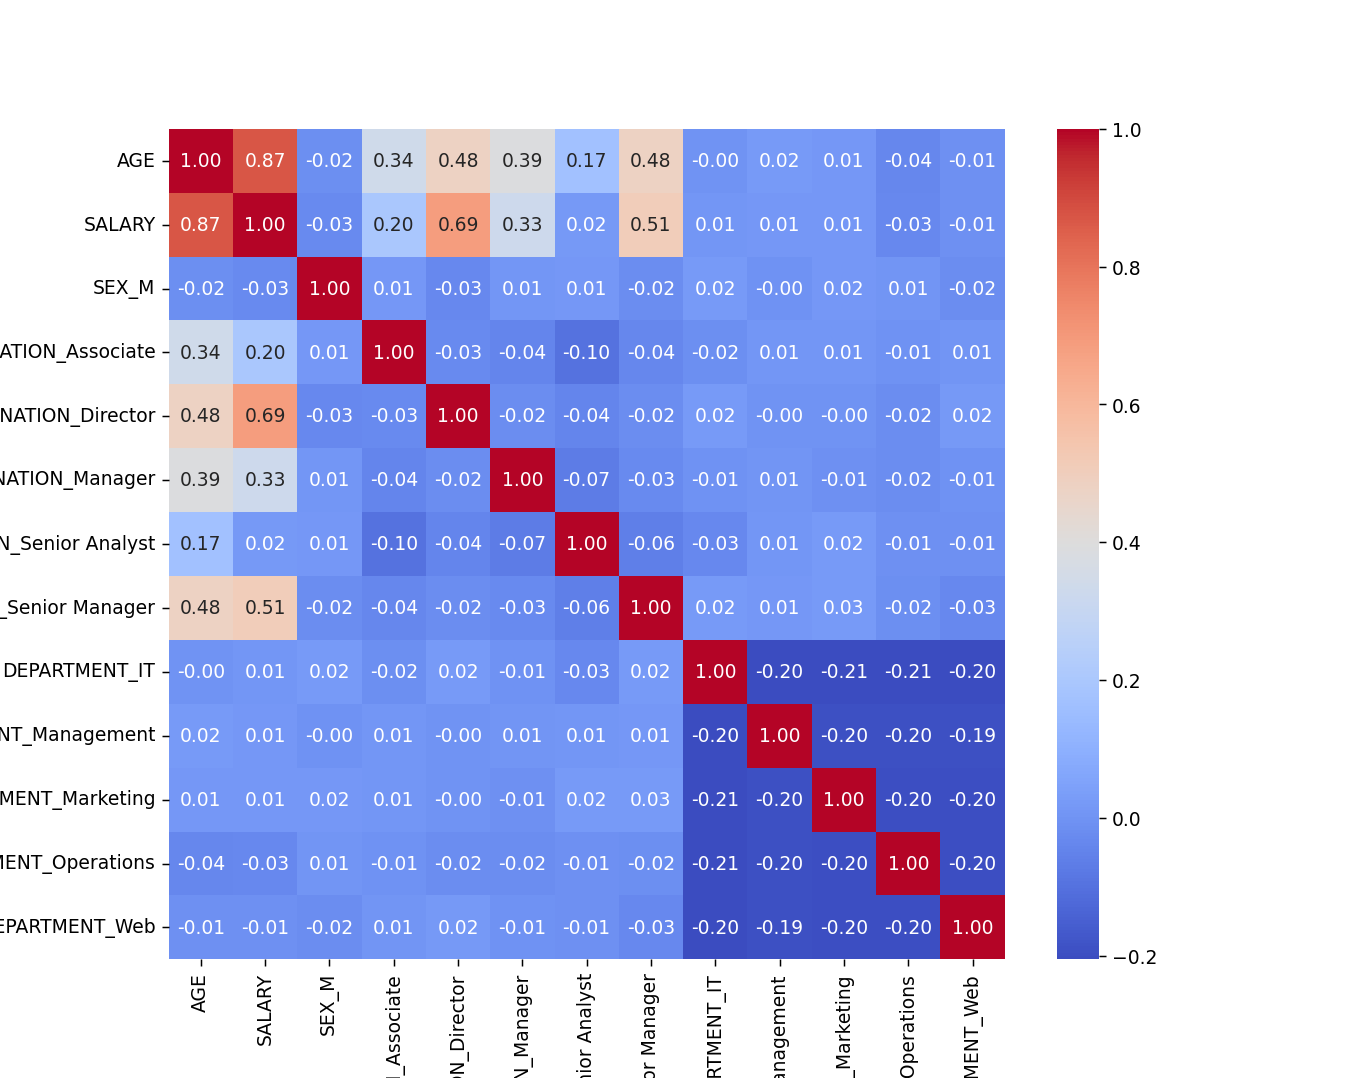

In [15]:
# generate dummy variables
dummy1 = ['SEX', 'DESIGNATION', 'DEPARTMENT']
df_dummy = pd.get_dummies(df[dummy1], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummy], axis=1)

# Dropping the original categorical columns
df.drop(columns=dummy1, inplace=True)

# Print the DataFrame to check the results
print(df)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
plt.savefig('heatmap.png', dpi=300)

In [16]:
# Select features (dummy variables) and target variable
X = df.drop('SALARY', axis=1)  # Features (all columns except salary)
y = df['SALARY']  # Target variable


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

Mean Absolute Error (MAE): 4203.887192804544
Mean Squared Error (MSE): 46434697.698581785
Root Mean Squared Error (RMSE): 6814.300969181049
R^2 Score: 0.9615899326665536
Coefficients: [90.14769528743052, -479.0145062565777, 41247.809572784034, 241184.97556998095, 81343.98350436357, 14471.96744171834, 132679.3300868869, -861.2457960955603, -474.95638250700284, 67.96444326038562, -282.6069050269678, -634.4500070461773]
Intercept: 43560.23541590144


### Model Performance Metrics

- **Mean Absolute Error (MAE): 4203.73
- This tells you the average absolute difference between predicted and actual salaries. On average, your model’s predictions are off by about 4203.73 units.
- **Mean Squared Error (MSE): 46430830.24
- This metric penalizes larger errors more than smaller ones due to squaring the residuals. It is sensitive to outliers.
- **Root Mean Squared Error (RMSE): 6814.02
- This is the square root of MSE and gives an error metric in the same units as the target variable. An RMSE of 6814.02 means that the typical prediction error is around this value.
- **R² Score: 0.9616
- An R² score of 0.9616 indicates that about 96.16% of the variance in the salary can be explained by the model. This is a high value, suggesting a good fit.
 

<IPython.core.display.Javascript object>


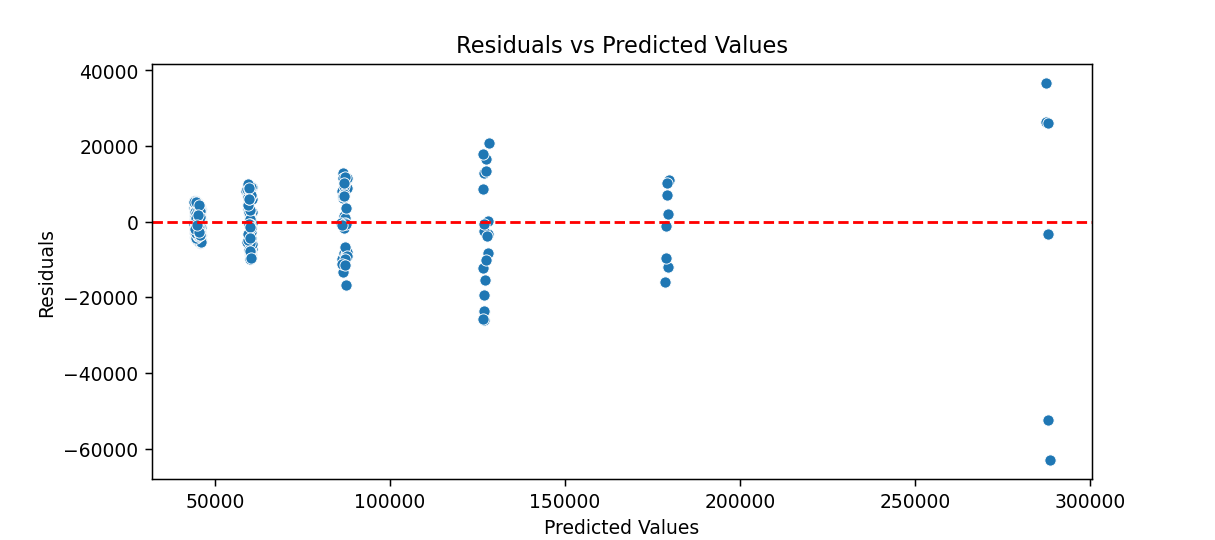

<IPython.core.display.Javascript object>


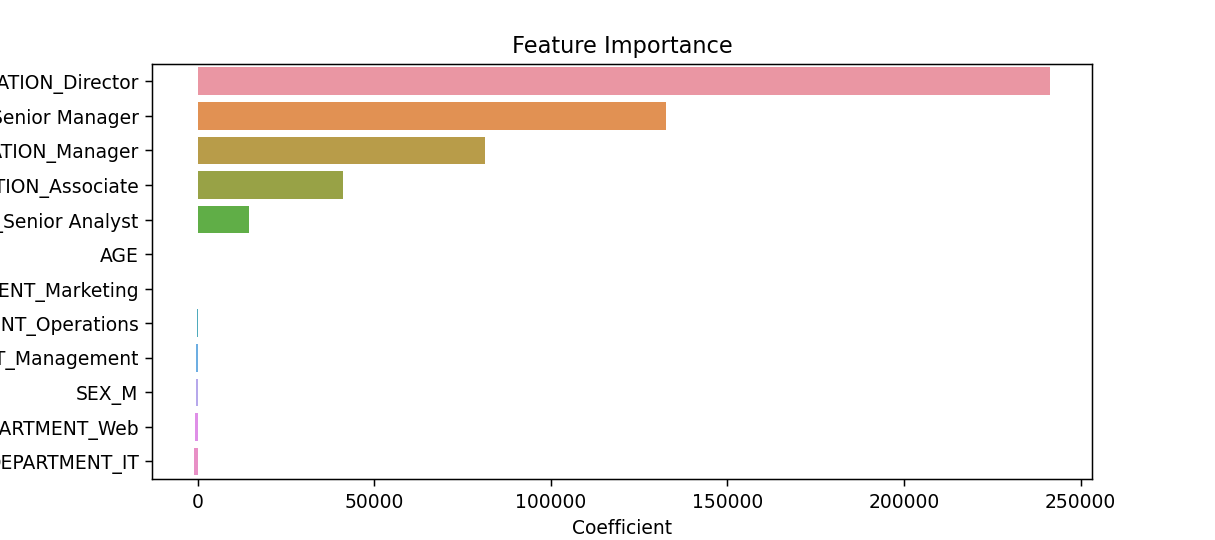

In [19]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(9, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
plt.savefig('scatter.png', dpi=300)

# Feature Importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(9, 4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()
plt.savefig('barplot.png', dpi=300)

### Feature Importance
- **The feature importance plot shows that:

- Designation is the most significant factor influencing salary, especially the "Director" and "Senior Manager" roles.
- Age and Department have a much smaller influence on salary compared to designation.
- Gender (SEX_M) appears to have a negligible effect, which is expected in a well-balanced or unbiased dataset.

### Residuals vs. Predicted Values
- **The residuals plot indicates:

- Homoscedasticity: The residuals seem to be evenly distributed across the range of predicted values, which is a good sign. It suggests that the variance of the errors is constant.
- Outliers: There are a few outliers, especially at higher predicted salary values. These points have large residuals and may indicate model limitations or exceptional cases in the data.

### This is the Salary prediction of a person who is a Designation Senior Manager, in the marketing department and his age is 35

In [20]:
# Example input values

input_data = {
    'AGE': 35,
    'SEX_M': 0,
    'DESIGNATION_Associate': 0,
    'DESIGNATION_Director': 0,
    'DESIGNATION_Manager': 0,
    'DESIGNATION_Senior Analyst': 0,
    'DESIGNATION_Senior Manager': 1,
    'DEPARTMENT_IT': 0,
    'DEPARTMENT_Management': 0,
    'DEPARTMENT_Marketing': 1,
    'DEPARTMENT_Operations': 0,
    'DEPARTMENT_Web': 0
    
}
input_data_df = pd.DataFrame(input_data, index=[0])

y_pred = model.predict(input_data_df)

# Predicted salary based on the input data
predicted_salary = y_pred[0]  # Access the predicted value from the DataFrame
print(f"\nPredicted Salary: {predicted_salary:.2f}")


Predicted Salary: 179462.70
